In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm, datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

df = pd.read_csv("Salary.csv")
df_binary = df[['YearsExperience', 'Salary']]

df_binary.columns = ['YearsExperience', 'Salary']

df_binary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


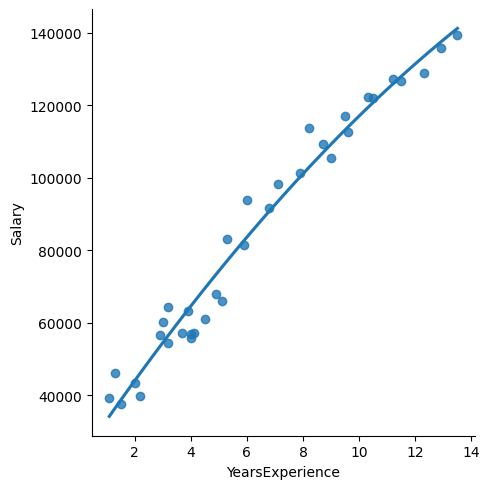

In [3]:
sns.lmplot(x ='YearsExperience', y ='Salary', data = df_binary, order = 2, ci = None)


In [4]:
pears_corr_coef = np.corrcoef(df.YearsExperience, df.Salary)
print(pears_corr_coef)

[[1.         0.98242725]
 [0.98242725 1.        ]]


In [5]:
df_binary.fillna(method ='ffill', inplace = True)

In [27]:
X = np.array(df_binary['YearsExperience']).reshape(-1, 1)
y = np.array(df_binary['Salary']).reshape(-1, 1)

df_binary.dropna(inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()

regr.fit(X_train, y_train)
print("Score:", regr.score(X_test, y_test))

Score: 0.9578812696774771


predicted response:
[[137199.50110559]
 [121469.8831277 ]
 [ 65542.35253966]
 [ 63794.61720878]
 [ 74281.02919404]
 [ 39326.32257651]
 [ 89136.77950649]
 [113605.07413876]
 [ 64668.48487422]]


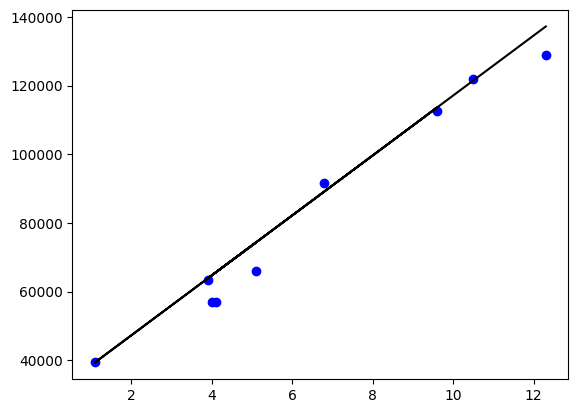

In [7]:
y_pred = regr.predict(X_test)
print(f"predicted response:\n{y_pred}")
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()


In [8]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 4158.452650038274
MSE: 30944459.54407023
RMSE: 5562.774446629149


In [31]:
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)

TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34] TEST: [0]
[[ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]
 [11.2]
 [11.5]
 [12.3]
 [12.9]
 [13.5]] [[1.1]] [[ 46205]
 [ 37731]
 [ 43525]
 [ 39891]
 [ 56642]
 [ 60150]
 [ 54445]
 [ 64445]
 [ 57189]
 [ 63218]
 [ 55794]
 [ 56957]
 [ 57081]
 [ 61111]
 [ 67938]
 [ 66029]
 [ 83088]
 [ 81363]
 [ 93940]
 [ 91738]
 [ 98273]
 [101302]
 [113812]
 [109431]
 [105582]
 [116969]
 [112635]
 [122391]
 [121872]
 [127345]
 [126756]
 [128765]
 [135675]
 [139465]] [[39343]]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34] TEST: [1]
[[ 1.1]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5

In [26]:
# Perform 6-fold cross validation
scores = cross_val_score(regr, df, y, cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [1. 1. 1. 1. 1. 1.]


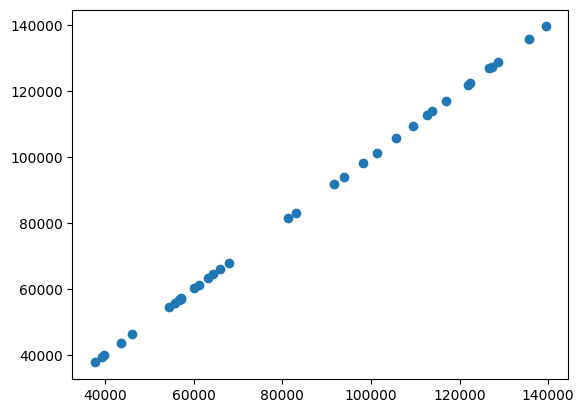

In [28]:
predictions = cross_val_predict(regr, df, y, cv=6)
plt.scatter(y, predictions)

In [29]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 1.0
